# EAS 4610 - Earth Systems Modeling - Final Project
## Landscape Evolution - Changes in Elevation due to Erosion over Time
### By: Carson Clements, Maci Harrell, Kevin Lu
### Due: Tuesday, December 5th at 11:59 PM ET
### Requirements/Rubric: https://gatech.instructure.com/courses/321828/assignments/1404688
## Original Paper (Landscape Evolution, Willgoose 2004): https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.33.092203.122610

### The Necessary Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameterization and Grid-Setting

In [2]:
# Parameters
Grid_Length = 100  # Length in meters
T = 1000   # Simulation time - years

Nx = 100   # Number of spatial grid points
Nt = 500   # Number of time steps
dx = Grid_Length / (Nx - 1)
dt = T / Nt

Slope_Peak = 20 # meters
Slope_Width_Constant = 100

U = 0.005     # Tectonic Uplift - meters per year
lamb = 365*24*60 # Occurrence of entrainment (detachment) events
M = 1e-7 # The average mass of sediment per entrainment event
L = 1 # the average travel distance of the sendiment - meters

# Advection and diffusion coefficients
u = 0.01   # Advection velocity - Transport of landscape downwind with time - meters per year

### Defining Functions for a Constant Qs

In [3]:
def Initialize(Nx, Slope_Width, Slope_Peak, Nt):
    # Initial condition with slope
    X = np.arange(0, Nx, 1)
    R_initial = (np.exp(-((X-(0.5*Nx))**2)/Slope_Width))*Slope_Peak

    # Arrays to store the regolith depth at each grid point and time step
    R = np.zeros((Nt, Nx))


    # Set initial & Dirichlet boundary condition
    R[0, :] = R_initial
    R[:, 0] = R_initial[0]  # Left boundary
    R[:, -1] = R_initial[-1]  # Right boundary
    
    return R

In [4]:
def Solve(R, Adv_Coeff, deltaT, deltaX, Tec_Uplift, lamb, M, L):
    # Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
    Diff_Coeff = lamb*M*L  # Diffusion coefficient - equivalent to Qs
    
    for k in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            advection_term = Adv_Coeff * (R[k, i + 1] - R[k, i - 1]) / (2 * deltaX)
            diffusion_term = Diff_Coeff * (R[k, i + 1] - 2 * R[k, i] + R[k, i - 1]) / deltaX**2
            R[k + 1, i] = R[k, i] + deltaT * (diffusion_term - advection_term + Tec_Uplift)
    return R

### Defining Functions for a non-Constant Qs

In [5]:
def VInitialize(Nx, Slope_Width, Slope_Peak, Nt): # Initializing the Grid
    # Initial condition with slope
    X = np.arange(0, Nx, 1)
    R_initial = (np.exp(-((X-(0.5*Nx))**2)/Slope_Width))*Slope_Peak

    # Arrays to store the regolith depth at each grid point and time step
    R = np.zeros((Nt, Nx))

    # Set initial & Dirichlet boundary condition
    R[0, :] = R_initial
    R[:, 0] = R_initial[0]  # Left boundary
    R[:, -1] = R_initial[-1]  # Right boundary
    
    return R

In [6]:
def VSolve(R, Adv_Coeff, deltaT, deltaX, Tec_Uplift, sed_Vel):
    # Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
    # Variable Value for Qs based upon Formula D = Qs = Depth*Sediment Velocity
    for k in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            Diff_Coeff = R[k, i] * sed_Vel
            advection_term = Adv_Coeff * (R[k, i + 1] - R[k, i - 1]) / (2 * deltaX)
            diffusion_term = Diff_Coeff * (R[k, i + 1] - 2 * R[k, i] + R[k, i - 1]) / deltaX**2
            R[k + 1, i] = R[k, i] + dt * (diffusion_term - advection_term + Tec_Uplift)
            #print(Diff_Coeff)
    return R

## Figures

### Plot 1 - Low vs High Diffusion

Text(0, 0.5, 'Time (t) in Years')

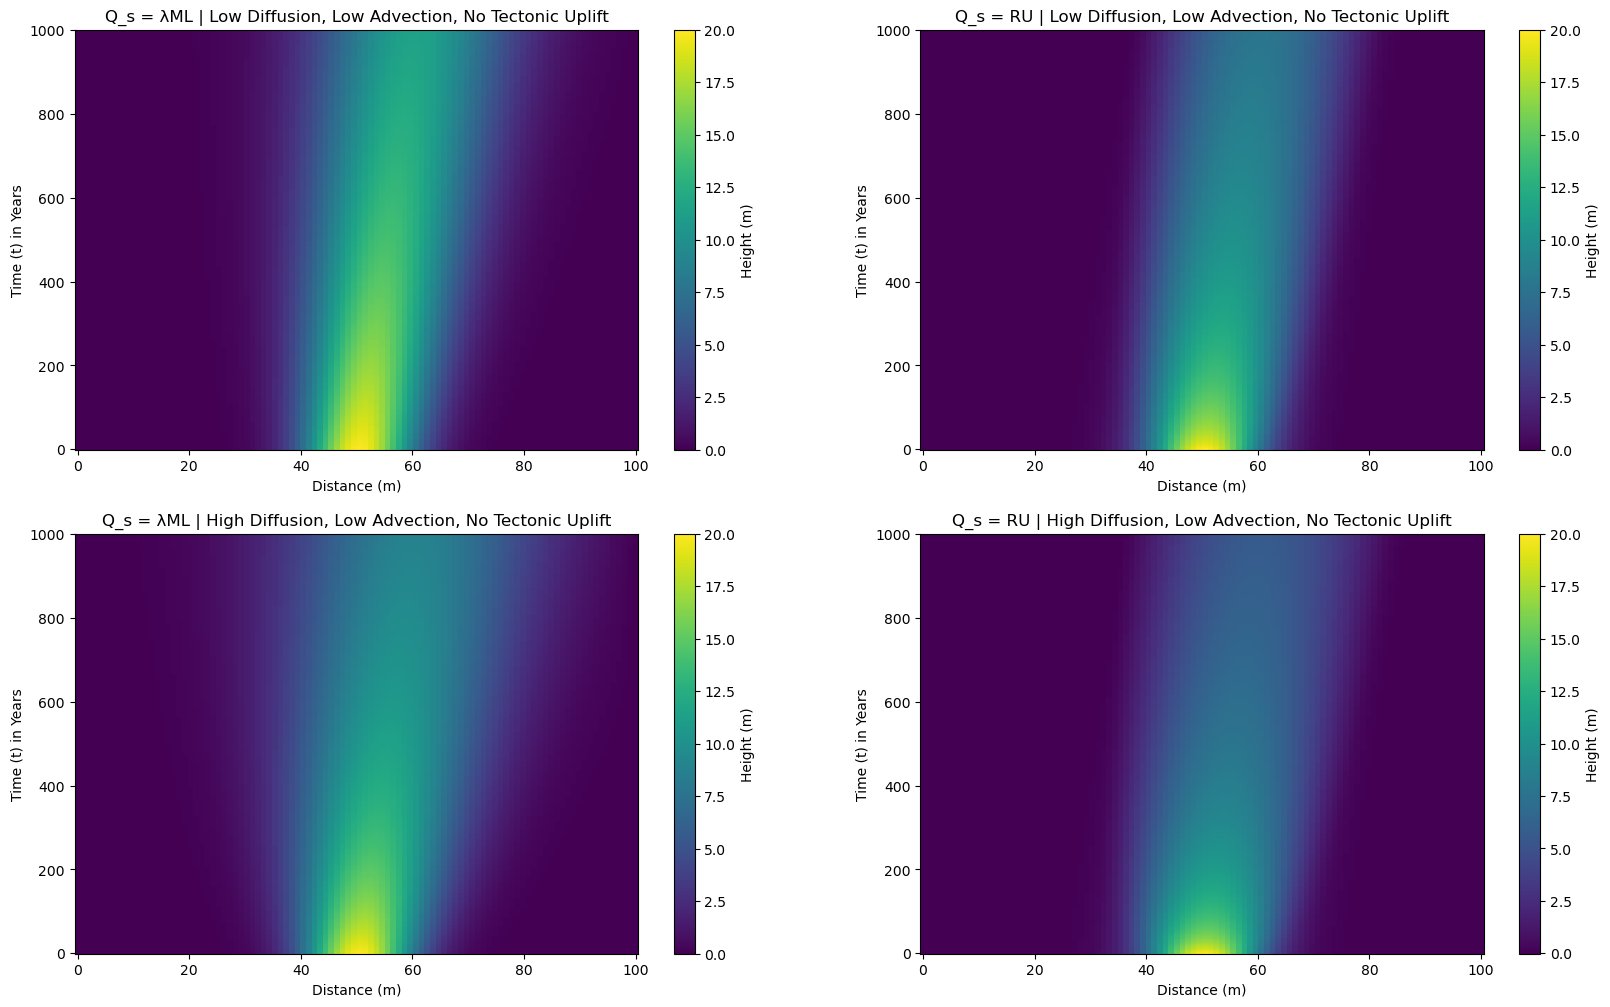

In [7]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, u, dt, dx, 0, lamb, M*2, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, u, dt, dx, 0, 0.01*2)


x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = λML | High Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = RU | High Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

### Plot 2 - Insignificant vs Significant Tectonic Uplift

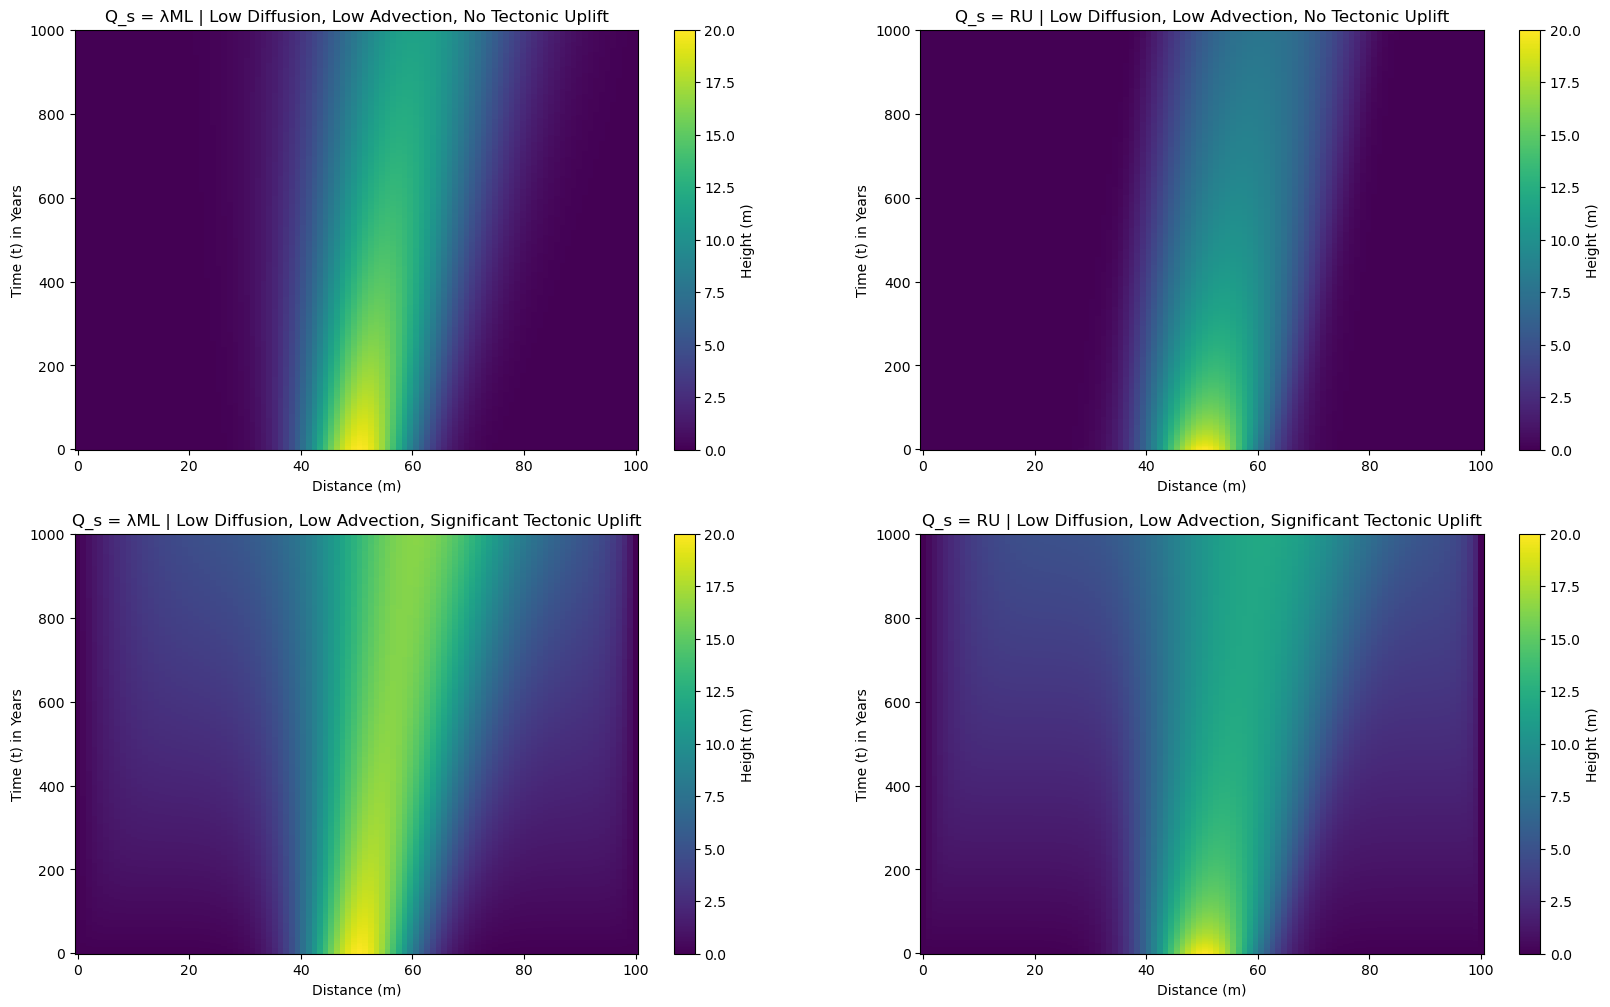

In [8]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, u, dt, dx, U, lamb, M, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, u, dt, dx, U, 0.01)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 3 - Low vs High Advection

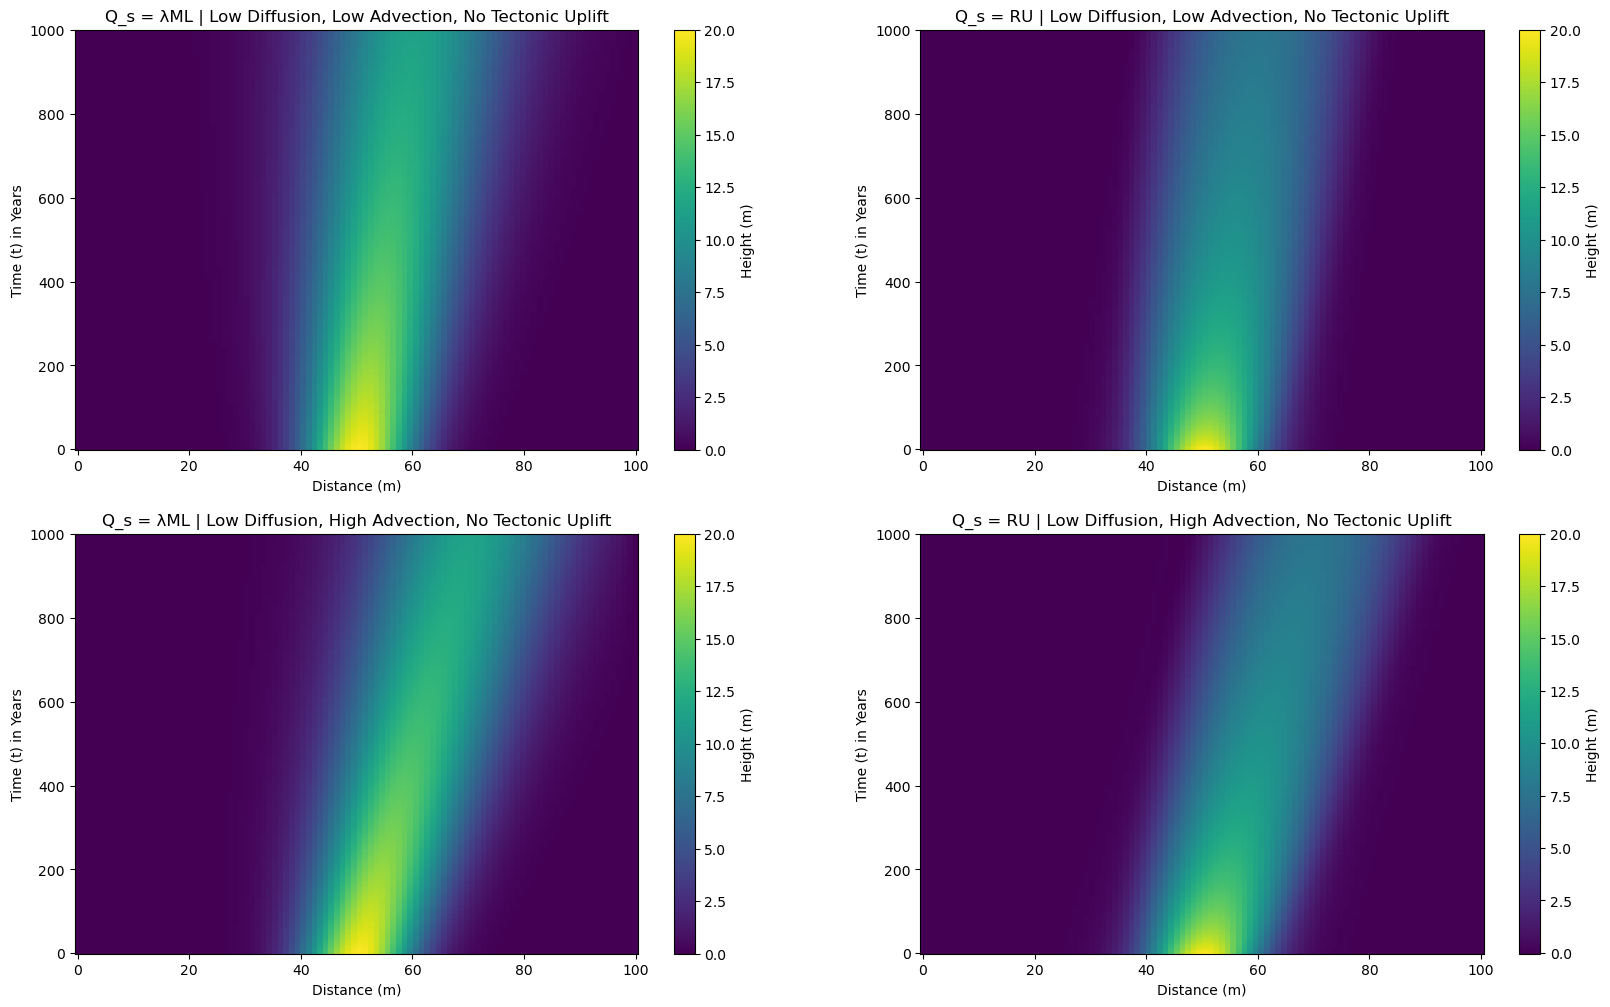

In [9]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, dt, dx, 0, lamb, M, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 2*u, dt, dx, 0, 0.01)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 4 - Low vs High Advection/Diffusion

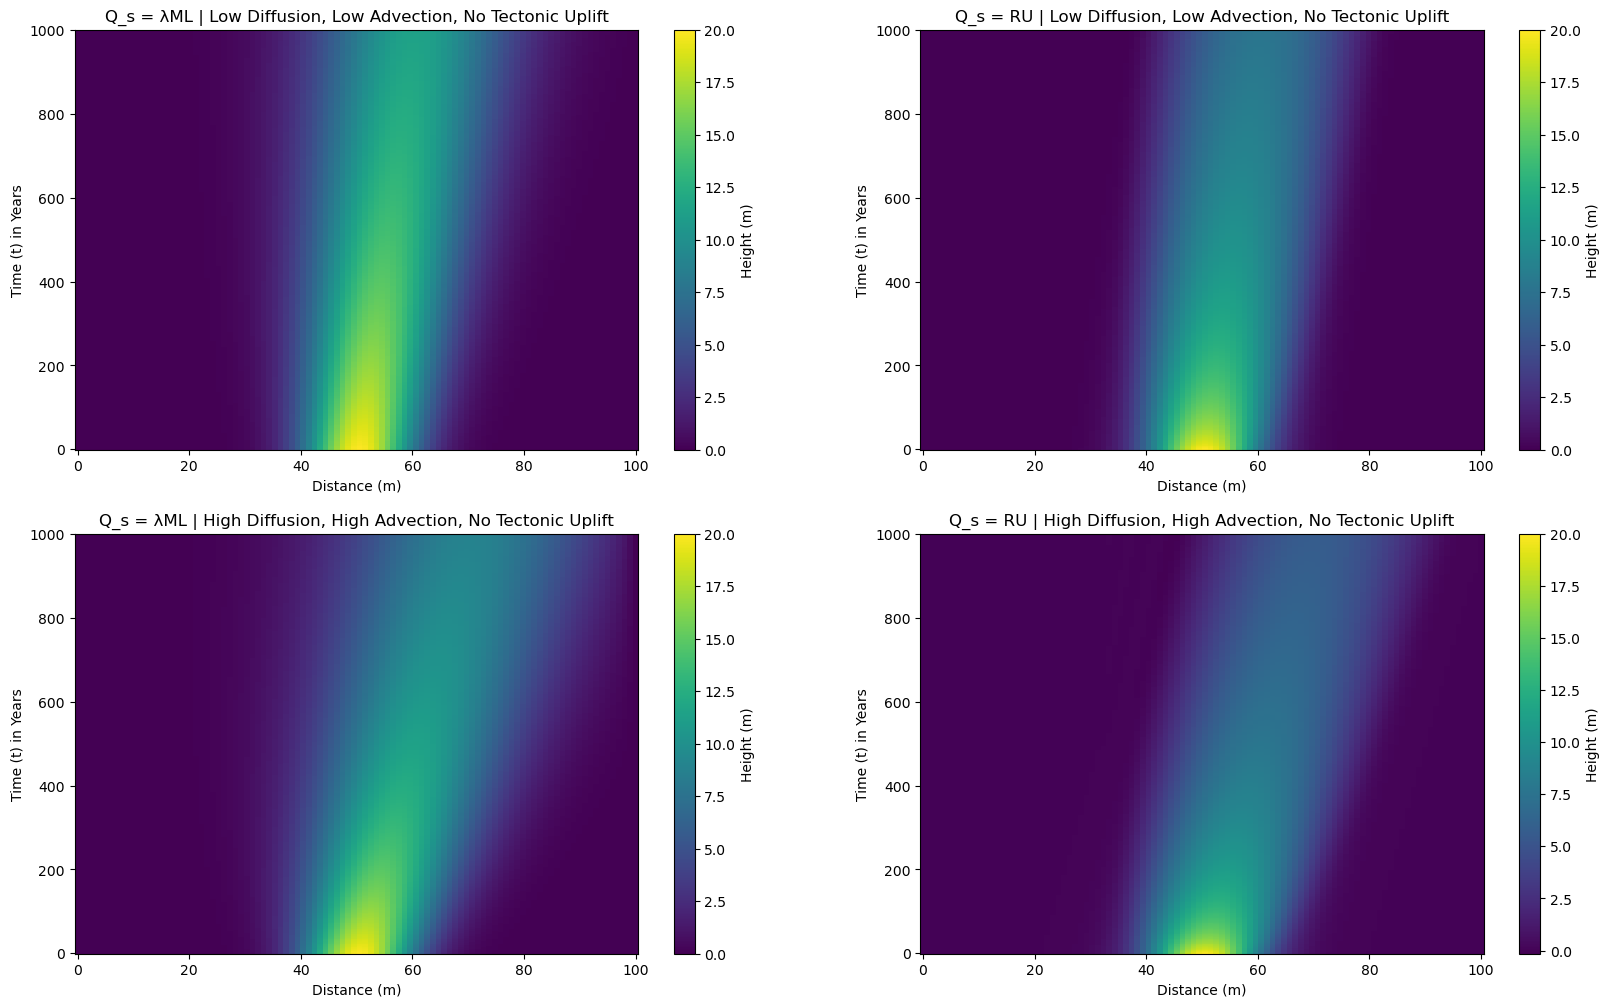

In [10]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, dt, dx, 0, lamb, M*2, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 2*u, dt, dx, 0, 0.01*2)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | High Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | High Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 5 - Low vs High Advection/Diffusion/Uplift

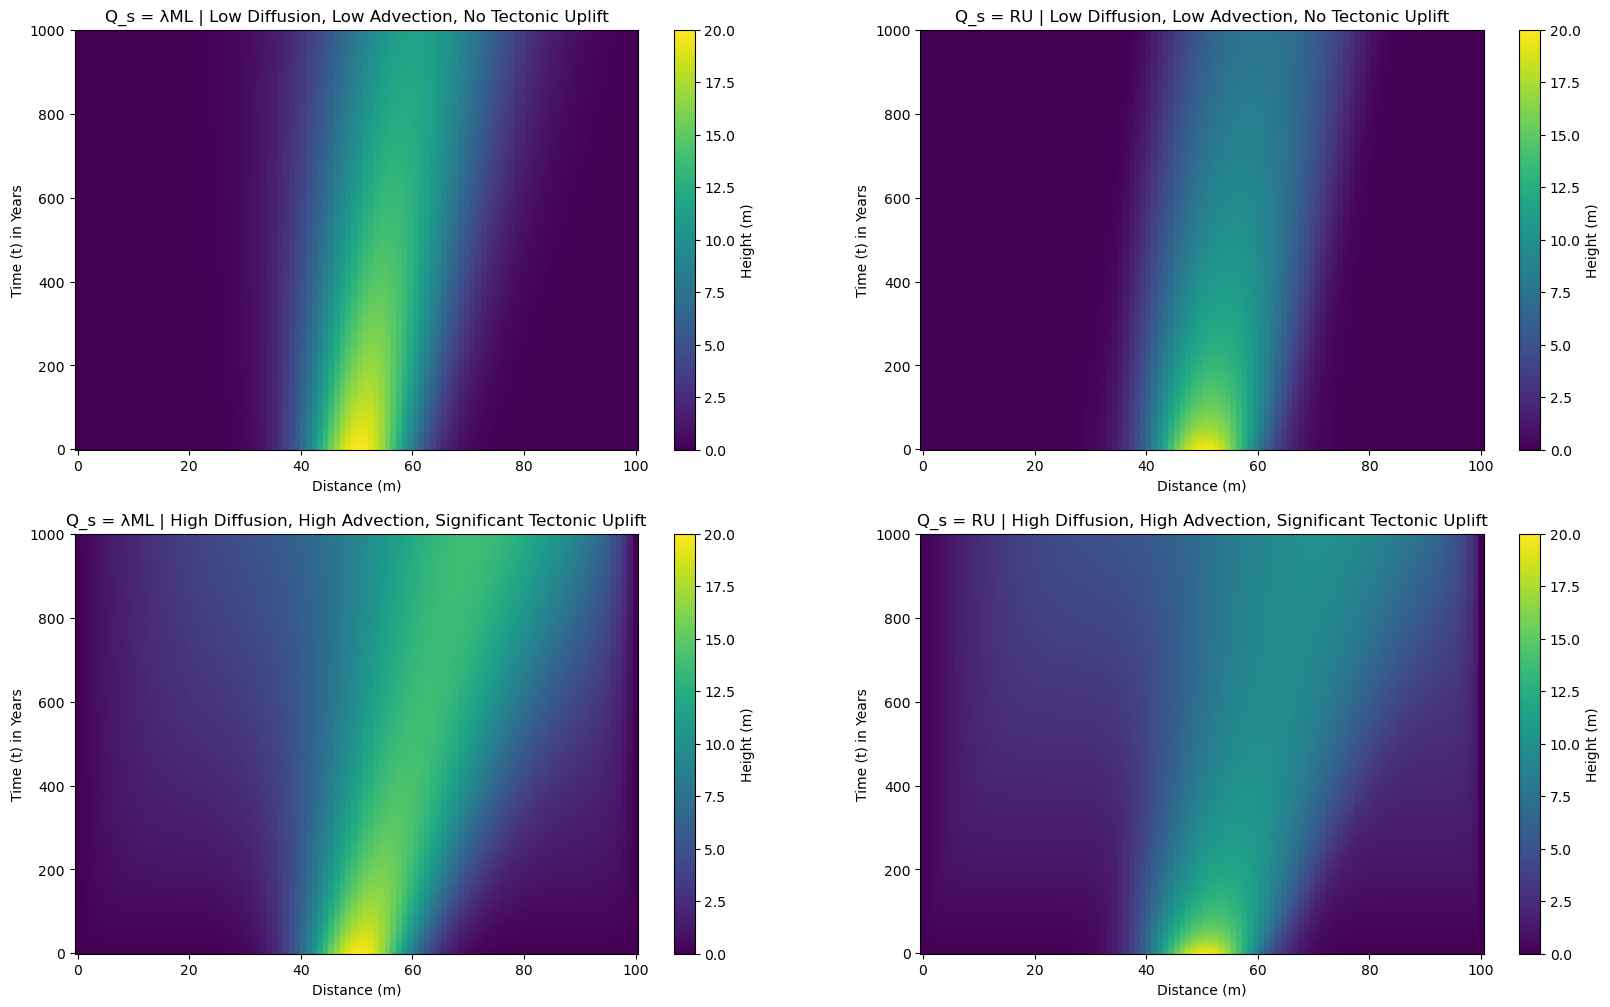

In [11]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, dt, dx, U, lamb, M*2, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 2*u, dt, dx, U, 0.01*2)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | High Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | High Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()